# **Часть 1: обучение модели регрессии для предсказания стоимости автомобилей**



In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

## **Простейший EDA и обработка признаков**

In [256]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


Я выполнила базовые операции с pandas:

* Вывела 10 случайных строк из тренировочного датасета.
* Посмотрела первые и последние 5 строк тестового датасета.
* Проверила наличие пропусков и вывела названия колонок, в которых они есть.
* Проверила данные на наличие явных дубликатов.



In [257]:
# 10 случайных строк тренировочного датасета
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [258]:
# Первые 5 объектов тестового датасета
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [259]:
# Последние 5 объектов тестового датасета
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [260]:
# Смотрим на пропуски в тренировочном и тестовом датасете
print('Выводим названия колонок в df_train, для которых есть пропущенные значения')
for index, row in pd.DataFrame(pd.isnull(df_train).sum()).iterrows():
    for column in pd.DataFrame(pd.isnull(df_train).sum()).columns:
        if row[column] != 0:
            print(index, row[column])

Выводим названия колонок в df_train, для которых есть пропущенные значения
mileage 202
engine 202
max_power 196
torque 203
seats 202


In [261]:
# Смотрим на пропуски в тренировочном и тестовом датасете
print('Выводим названия колонок в df_test, для которых есть пропущенные значения')
for index, row in pd.DataFrame(pd.isnull(df_test).sum()).iterrows():
    for column in pd.DataFrame(pd.isnull(df_test).sum()).columns:
        if row[column] != 0:
            print(index, row[column])

Выводим названия колонок в df_test, для которых есть пропущенные значения
mileage 19
engine 19
max_power 19
torque 19
seats 19


In [262]:
df_train.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,object
engine,object


Чтобы убедиться, что у нас пропущены значения только в 5 колонках, посмотрим на уникальные значения для переменных object. Ниже приведена только часть кода, когда искали пропуски '' тк пропусков не нашлось (и нет смысла показывать это для всех переменных)

In [263]:
count = 0
for obj in df_train['name'].unique():
    if obj.replace(' ', '') == '':
        count += 1
print(count)

0


In [264]:
# Посмотрим на явные дубликаты в df_train
if df_train.duplicated().all() == False:
    print('Явных дубликатов в df_train нет')
else:
    print('Явные дубликаты в df_train есть')

Явных дубликатов в df_train нет


In [265]:
# Посмотрим на явные дубликаты в df_test
if df_test.duplicated().all() == False:
    print('Явных дубликатов в df_test нет')
else:
    print('Явные дубликаты в df_test есть')

Явных дубликатов в df_test нет


Я обнаружила пропуски и решила от них избавиться.
Заполнила пропущенные значения медианой, рассчитанной по тренировочному набору, и использовала её же для заполнения пропусков в тестовом наборе — чтобы не допустить утечки информации из теста.
После обработки убедилась, что пропусков больше нет ни в одном из датасетов.

In [266]:
import statistics as s
import math
import re

In [267]:
# mileage
kmpl = []
for obj in df_train['mileage']:
    if type(obj) == str:
        obj = obj.split()
        kmpl.append(float(obj[0]))
print(f'Медиана для переменной "mileage" равна: {s.median(kmpl)}')

Медиана для переменной "mileage" равна: 19.3


In [268]:
# Заполняем пропуски в df_train и df_test
df_train.loc[df_train['mileage'].isnull() == True, 'mileage'] = '19.3 kmpl'
df_test.loc[df_test['mileage'].isnull() == True, 'mileage'] = '19.3 kmpl'

In [269]:
# Проверяем заполнение пропусков
print(pd.isnull(df_train['mileage']).sum())
print(pd.isnull(df_test['mileage']).sum())

0
0


In [270]:
# engine
CC = []
for obj in df_train['engine']:
    if type(obj) == str:
        obj = obj.split()
        CC.append(float(obj[0]))
print(f'Медиана для переменной "engine" равна: {s.median(CC)}')

Медиана для переменной "engine" равна: 1248.0


In [271]:
# Заполняем пропуски в df_train и df_test
df_train.loc[df_train['engine'].isnull() == True, 'engine'] = '1248.0 CC'
df_test.loc[df_test['engine'].isnull() == True, 'engine'] = '1248.0 CC'

In [272]:
# Проверяем заполнение пропусков
print(pd.isnull(df_train['engine']).sum())
print(pd.isnull(df_test['engine']).sum())

0
0


В переменной max_power помимо пропусков со значением nan, есть еще пропуски такие: 'bhp' т.е. нет цифровенного значения.

In [273]:
# max_power
bhp = []
count_bhp = 0
for obj in df_train['max_power']:
    if type(obj) == str:
        if obj.replace(' ', '') != 'bhp':
            obj = obj.split()
            bhp.append(float(obj[0]))
        else:
            count_bhp += 1
print(f'Медиана равна: {s.median(bhp)}, количество пропусков с bhp: {count_bhp}')

Медиана равна: 82.0, количество пропусков с bhp: 1


In [274]:
# Заполняем пропуски в df_train и df_test
df_train.loc[df_train['max_power'].isnull() == True, 'max_power'] = '82.0 bhp'
df_test.loc[df_test['max_power'].isnull() == True, 'max_power'] = '82.0 bhp'

In [275]:
# Проверяем заполнение пропусков
print(pd.isnull(df_train['max_power']).sum())
print(pd.isnull(df_test['max_power']).sum())

0
0


In [276]:
for i in range(len(df_train['max_power'])):
    if df_train['max_power'][i].replace(' ', '') == 'bhp':
        df_train['max_power'][i] = '82.0 bhp'

for i in range(len(df_test['max_power'])):
    if df_test['max_power'][i].replace(' ', '') == 'bhp':
        df_test['max_power'][i] = '82.0 bhp'

<ipython-input-276-7e1bb54c50fc>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_train['max_power'][i] = '82.0 bhp'
<ipython-input-276-7e1bb54c50fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [277]:
# Проверяем заполнение пропусков
count_bhp = 0
for obj in df_train['max_power']:
    if obj.replace(' ', '') == 'bhp':
        count_bhp += 1
count_bhp

0

In [278]:
count_bhp = 0
for obj in df_test['max_power']:
    if obj.replace(' ', '') == 'bhp':
        count_bhp += 1
count_bhp

0

In [279]:
# torque
df_train['torque']

,torque
0,190Nm@ 2000rpm
1,250Nm@ 1500-2500rpm
2,22.4 kgm at 1750-2750rpm
3,"11.5@ 4,500(kgm@ rpm)"
4,113.75nm@ 4000rpm
...,...
6994,113.7Nm@ 4000rpm
6995,"24@ 1,900-2,750(kgm@ rpm)"
6996,190Nm@ 2000rpm
6997,140Nm@ 1800-3000rpm


Для переменной torque нельзя найти медиану (точнее можно было бы, если бы было какое-то описание единиц измерения). Для этой переменной можно найти моду. 

In [280]:
print(f"Мода для переменной torque: {df_train['torque'].mode()[0]}")

Мода для переменной torque: 190Nm@ 2000rpm


In [281]:
# Заполняем пропуски в df_train и df_test
df_train.loc[df_train['torque'].isnull() == True, 'torque'] = '190Nm@ 2000rpm'
df_test.loc[df_test['torque'].isnull() == True, 'torque'] = '190Nm@ 2000rpm'

In [282]:
# Проверяем заполнение пропусков
print(pd.isnull(df_train['torque']).sum())
print(pd.isnull(df_test['torque']).sum())

0
0


In [283]:
# seats
m = []
for obj in df_train['seats']:
    if math.isnan(obj) != True:
        m.append(obj)
print(f'Медиана для переменной "engine" равна: {s.median(m)}')

Медиана для переменной "engine" равна: 5.0


In [284]:
# Заполняем пропуски в df_train и df_test
df_train.loc[df_train['seats'].isnull() == True, 'seats'] = 5.0
df_test.loc[df_test['seats'].isnull() == True, 'seats'] = 5.0

In [285]:
# Проверяем заполнение пропусков
print(pd.isnull(df_train['seats']).sum())
print(pd.isnull(df_test['seats']).sum())

0
0


In [286]:
# Итоговая проверка для df_train
pd.isnull(df_train).sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [287]:
# Итоговая проверка для df_test
pd.isnull(df_test).sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


Я проверила, есть ли в тренировочном датасете объекты с одинаковым признаковым описанием (без учёта целевой переменной). Нашла такие дубликаты, вывела их и удалила — при несовпадающих значениях целевой переменной оставила первую строку. После этого сбросила индексы, чтобы они шли подряд от 0 без пропусков.

In [288]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


Целевая переменная — это переменная, которую модель машинного обучения пытается предсказать или объяснить. В нашем случае целевой переменной является 'selling_price'.

In [289]:
duplicates = df_train.drop(columns=['selling_price']).duplicated(keep=False)
print(f'Количество дубликатов: {df_train[duplicates].shape[0]}')

Количество дубликатов: 1799


In [290]:
# Выводим дубликаты
df_train[duplicates]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,19.3 kmpl,1248.0 CC,82.0 bhp,190Nm@ 2000rpm,5.0
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [291]:
# Удаляем повторяющиеся строки
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [292]:
# Обновляем индексы
df_train = df_train.reset_index(drop=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [293]:
assert df_train.shape == (5840, 13)


Я заметила, что признаки `mileage`, `engine`, `max_power` и `torque` имеют строковый тип, хотя содержат числовые данные.
Для обоих датасетов (train и test) я:

* убрала единицы измерения из mileage, engine и max_power,
* преобразовала эти столбцы к типу float,
* удалила столбец torque для упрощения (хотя в идеале его тоже стоило бы обработать).

In [294]:
# Сначала переименуем столбцы в df_train и df_test
df_train.rename(columns = {'mileage': 'mileage (kmpl)', 'engine': 'engine (CC)', 'max_power': 'max_power (bhp)'}, inplace=True)
df_test.rename(columns = {'mileage': 'mileage (kmpl)', 'engine': 'engine (CC)', 'max_power': 'max_power (bhp)'}, inplace=True)

# Проверим
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [295]:
# Удалим столбец torque
df_train.drop(columns=['torque'], inplace=True)
df_test.drop(columns=['torque'], inplace=True)

# Проверим
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0


In [296]:
# Уберем единицы измерения
def processing(x):
    try:
        return float(x.split()[0])
    except (ValueError, IndexError):
        return None

columns_to_process = ['mileage (kmpl)', 'engine (CC)', 'max_power (bhp)']
df_train[columns_to_process] = df_train[columns_to_process].applymap(processing)
df_test[columns_to_process] = df_test[columns_to_process].applymap(processing)

# Проверим
df_train.head()

<ipython-input-296-6b68c2287b38>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train[columns_to_process] = df_train[columns_to_process].applymap(processing)
<ipython-input-296-6b68c2287b38>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_test[columns_to_process] = df_test[columns_to_process].applymap(processing)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0



Теперь, когда пропусков не осталось, я привела столбцы `engine` и `seats` к типу int.

In [297]:
# Посмотрим сколько Кб занимают наши таблички
print(df_train.memory_usage(deep=True).sum() / 1024)
print(df_test.memory_usage(deep=True).sum() / 1024)

2278.8447265625
390.1162109375


In [298]:
# Преобразуем столбцы engnine и seats к типу int
df_train = df_train.astype({'engine (CC)': 'int', 'seats': 'int'}, copy=False)
df_test = df_test.astype({'engine (CC)': 'int', 'seats': 'int'}, copy=False)

In [299]:
# Преобразуем в более "узкие" типы данных
fcols = df_train.select_dtypes('float').columns
icols = df_train.select_dtypes('integer').columns

df_train[fcols] = df_train[fcols].apply(pd.to_numeric, downcast='float')
df_train[icols] = df_train[icols].apply(pd.to_numeric, downcast='integer')

df_test[fcols] = df_test[fcols].apply(pd.to_numeric, downcast='float')
df_test[icols] = df_test[icols].apply(pd.to_numeric, downcast='integer')

In [300]:
# Посмотрим сколько теперь Кб занимают наши таблички
print(df_train.memory_usage(deep=True).sum() / 1024)
print(df_test.memory_usage(deep=True).sum() / 1024)

2079.2353515625
355.9365234375


In [301]:
# Проверим
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248,74.000000,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498,103.519997,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396,90.000000,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298,88.199997,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.139999,1197,81.860001,5


In [302]:
df_train.dtypes

,0
name,object
year,int16
selling_price,int32
km_driven,int32
fuel,object
seller_type,object
transmission,object
owner,object
mileage (kmpl),float32
engine (CC),int16


Переменные ниже можно перевести из типа object в category

In [303]:
len(df_train['name'].unique())

1924

Переменная 'name' тоже является категориальной. В ней просто слишком много категорий.

In [304]:
df_train['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [305]:
df_train['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [306]:
df_train['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [307]:
df_train['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [308]:
df_train[['name', 'fuel', 'seller_type', 'transmission', 'owner']] = df_train[['name', 'fuel', 'seller_type', 'transmission', 'owner']].astype('category')
df_test[['name', 'fuel', 'seller_type', 'transmission', 'owner']] = df_test[['name', 'fuel', 'seller_type', 'transmission', 'owner']].astype('category')

In [309]:
# Посмотрим сколько теперь Кб занимают наши таблички
print(df_train.memory_usage(deep=True).sum() / 1024)
print(df_test.memory_usage(deep=True).sum() / 1024)

377.9599609375
94.2998046875


In [310]:
df_train.dtypes

,0
name,category
year,int16
selling_price,int32
km_driven,int32
fuel,category
seller_type,category
transmission,category
owner,category
mileage (kmpl),float32
engine (CC),int16


Отлично! После «косметической» предобработки я перешла к важному этапу — анализу статистик.
Я рассчитала основные статистики:

* по числовым столбцам — с помощью describe() без дополнительных аргументов,
* по категориальным — с помощью describe(include='object')

— отдельно для тренировочного и тестового датасетов.

Также я сравнила статистики до и после заполнения пропусков, чтобы убедиться, что предобработка не исказила исходные распределения.

In [311]:
# Основные статистики по числовым столбцам для df_train
df_train.describe(include=['integer', 'float'])

,year,selling_price,km_driven,mileage (kmpl),engine (CC),max_power (bhp),seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428612,1429.448973,87.910774,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986024,485.662834,31.639635,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950001,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.299999,1248.000000,81.860001,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.299999,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [312]:
# Основные статистики по числовым столбцам для df_test
df_test.describe(include=['integer', 'float'])

,year,selling_price,km_driven,mileage (kmpl),engine (CC),max_power (bhp),seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337481,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892735,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200001,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.549999,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.299999,1248.00000,82.424999,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.299999,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.259998,3604.00000,280.000000,9.000000


In [313]:
# Основные статистики по категориальным столбцам для df_train
df_train.describe(include=['category'])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [314]:
# Основные статистики по категориальным столбцам для df_test
df_test.describe(include=['category'])

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [315]:
assert df_train.shape == (5840, 12)

Визуализация данных — важный этап. Я использую её, чтобы:

* оценить распределения признаков и понять, какие модели могут подойти;
* сравнить распределения в train и test, чтобы убедиться, что обучающая и тестовая выборки согласованы;
* проверить, есть ли заметная связь между признаками и целевой переменной.

Если распределения сильно различаются, я не смешиваю выборки, а задумываюсь: не устарели ли данные в train или не изменились ли условия генерации данных. Подгонка распределений может привести к переобучению, поэтому действую осторожно.

In [316]:
from tqdm.auto import tqdm

In [ ]:
# Посмотрим на распределение в df_train
numeric_cols = df_train.select_dtypes(['integer', 'float']).columns
num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + (num_cols % 3), ncols=3, figsize=(13, (num_cols // 3 + 1) * 3))
for ax, col in tqdm(zip(axes.flatten(), numeric_cols)):
    ax.hist(df_train[col], bins=30, alpha=0.7)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(f'Meaning {col}')
    ax.set_ylabel('Frequency')
    ax.grid(True)

for i in range(num_cols, len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

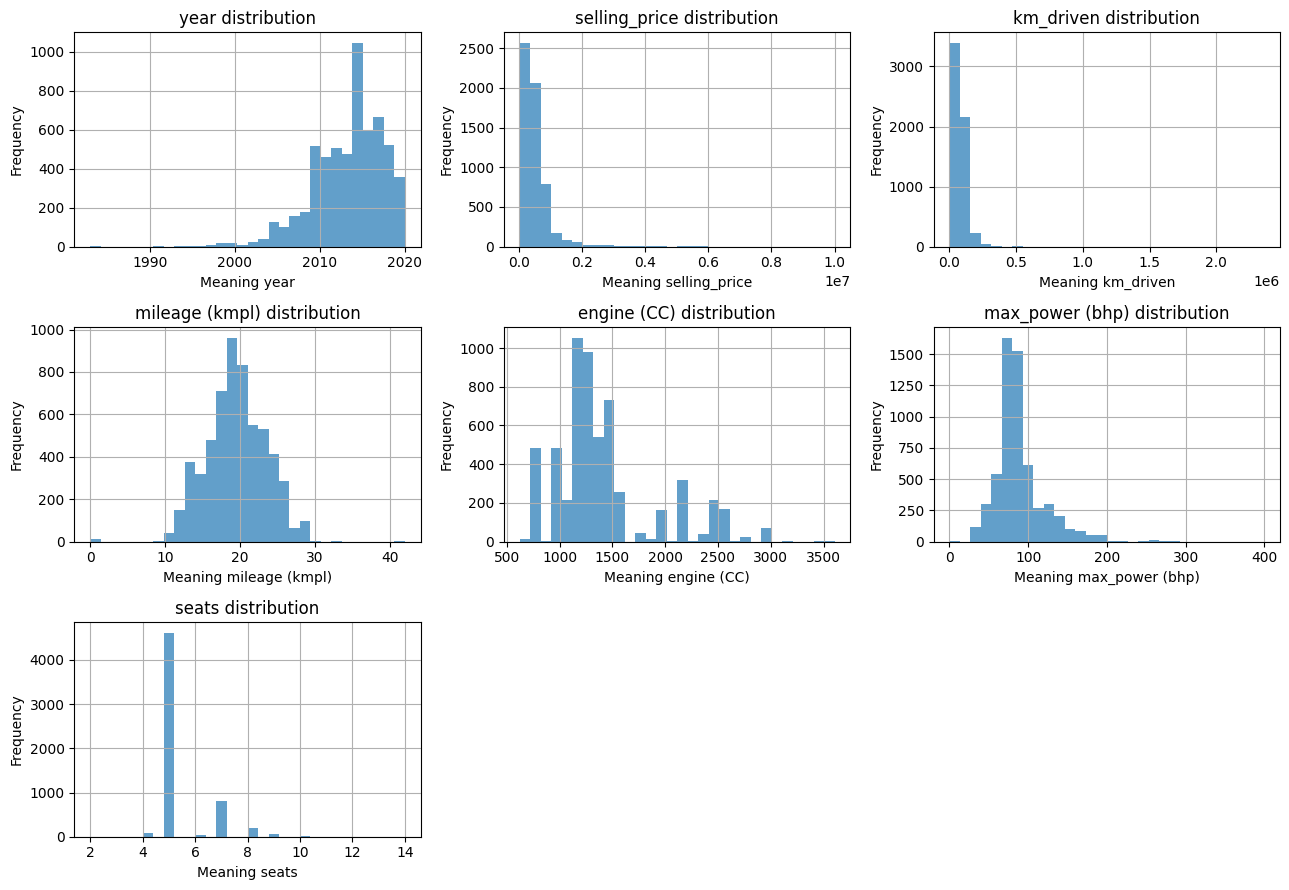

In [ ]:
# Посмотрим на распределение в df_test
numeric_cols = df_test.select_dtypes(['integer', 'float']).columns
num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + (num_cols % 3), ncols=3, figsize=(13, (num_cols // 3 + 1) * 3))
for ax, col in tqdm(zip(axes.flatten(), numeric_cols)):
    ax.hist(df_test[col], bins=30, alpha=0.7)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(f'Meaning {col}')
    ax.set_ylabel('Frequency')
    ax.grid(True)

for i in range(num_cols, len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

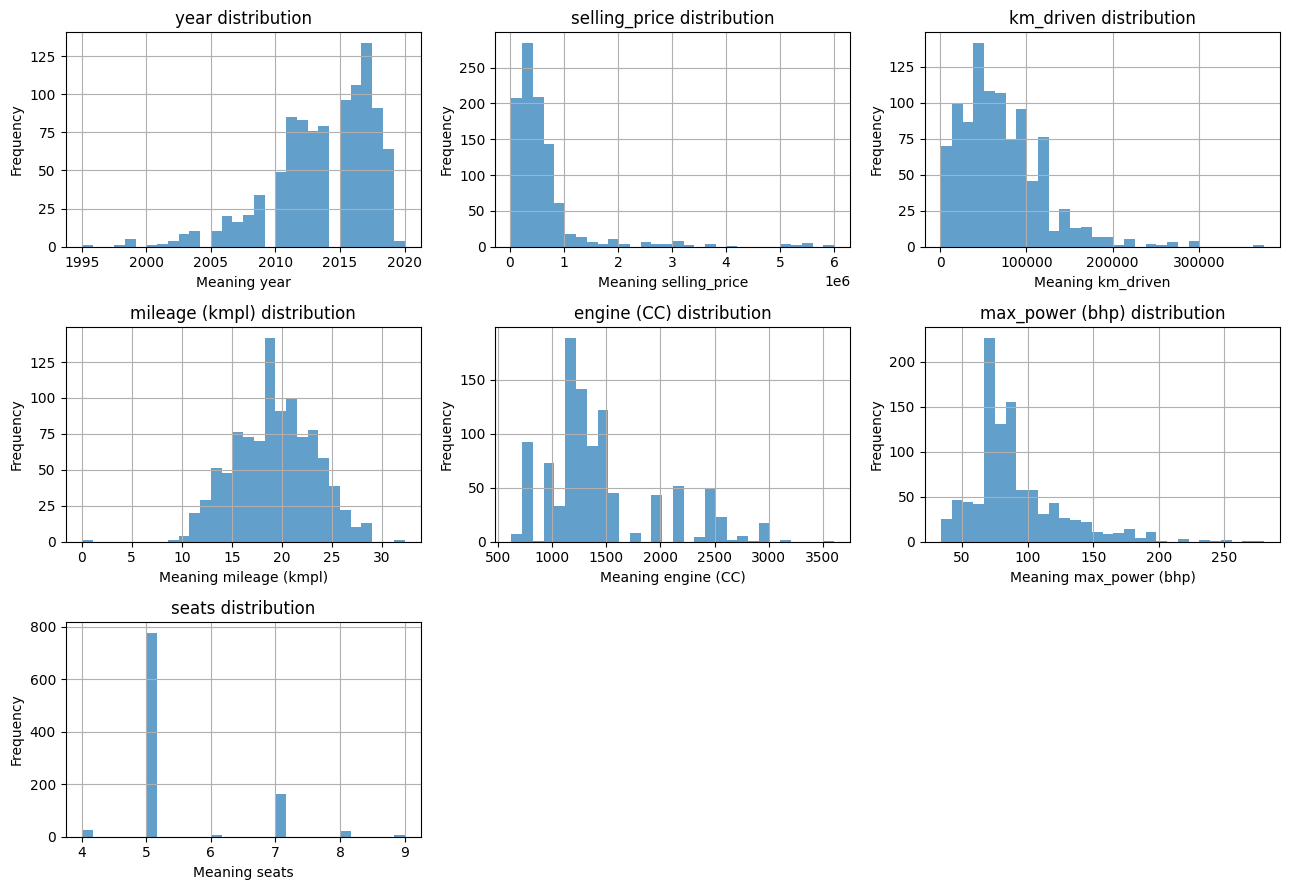

Распределения  train и test достаточно похожи.

Если смотреть на гистограммы, то можно увидеть, что у целевой переменной есть связь между engine (CC) и max_power (bhp).

In [319]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248,74.000000,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498,103.519997,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396,90.000000,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298,88.199997,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.139999,1197,81.860001,5


Шаг 1.
Я построила `pairplot` для тренировочного датасета с помощью библиотеки `seaborn`, чтобы визуализировать попарные распределения числовых признаков. По графику оценила:

* есть ли визуальные признаки связи между переменными и целевой переменной,
* можно ли предположить наличие корреляций между признаками.

Шаг 2.
Аналогично построила `pairplot` для тестовых данных и сравнила их с трейном. 

Сделала вывод: насколько похожи распределения в обеих выборках и не было ли смещения при разделении данных.

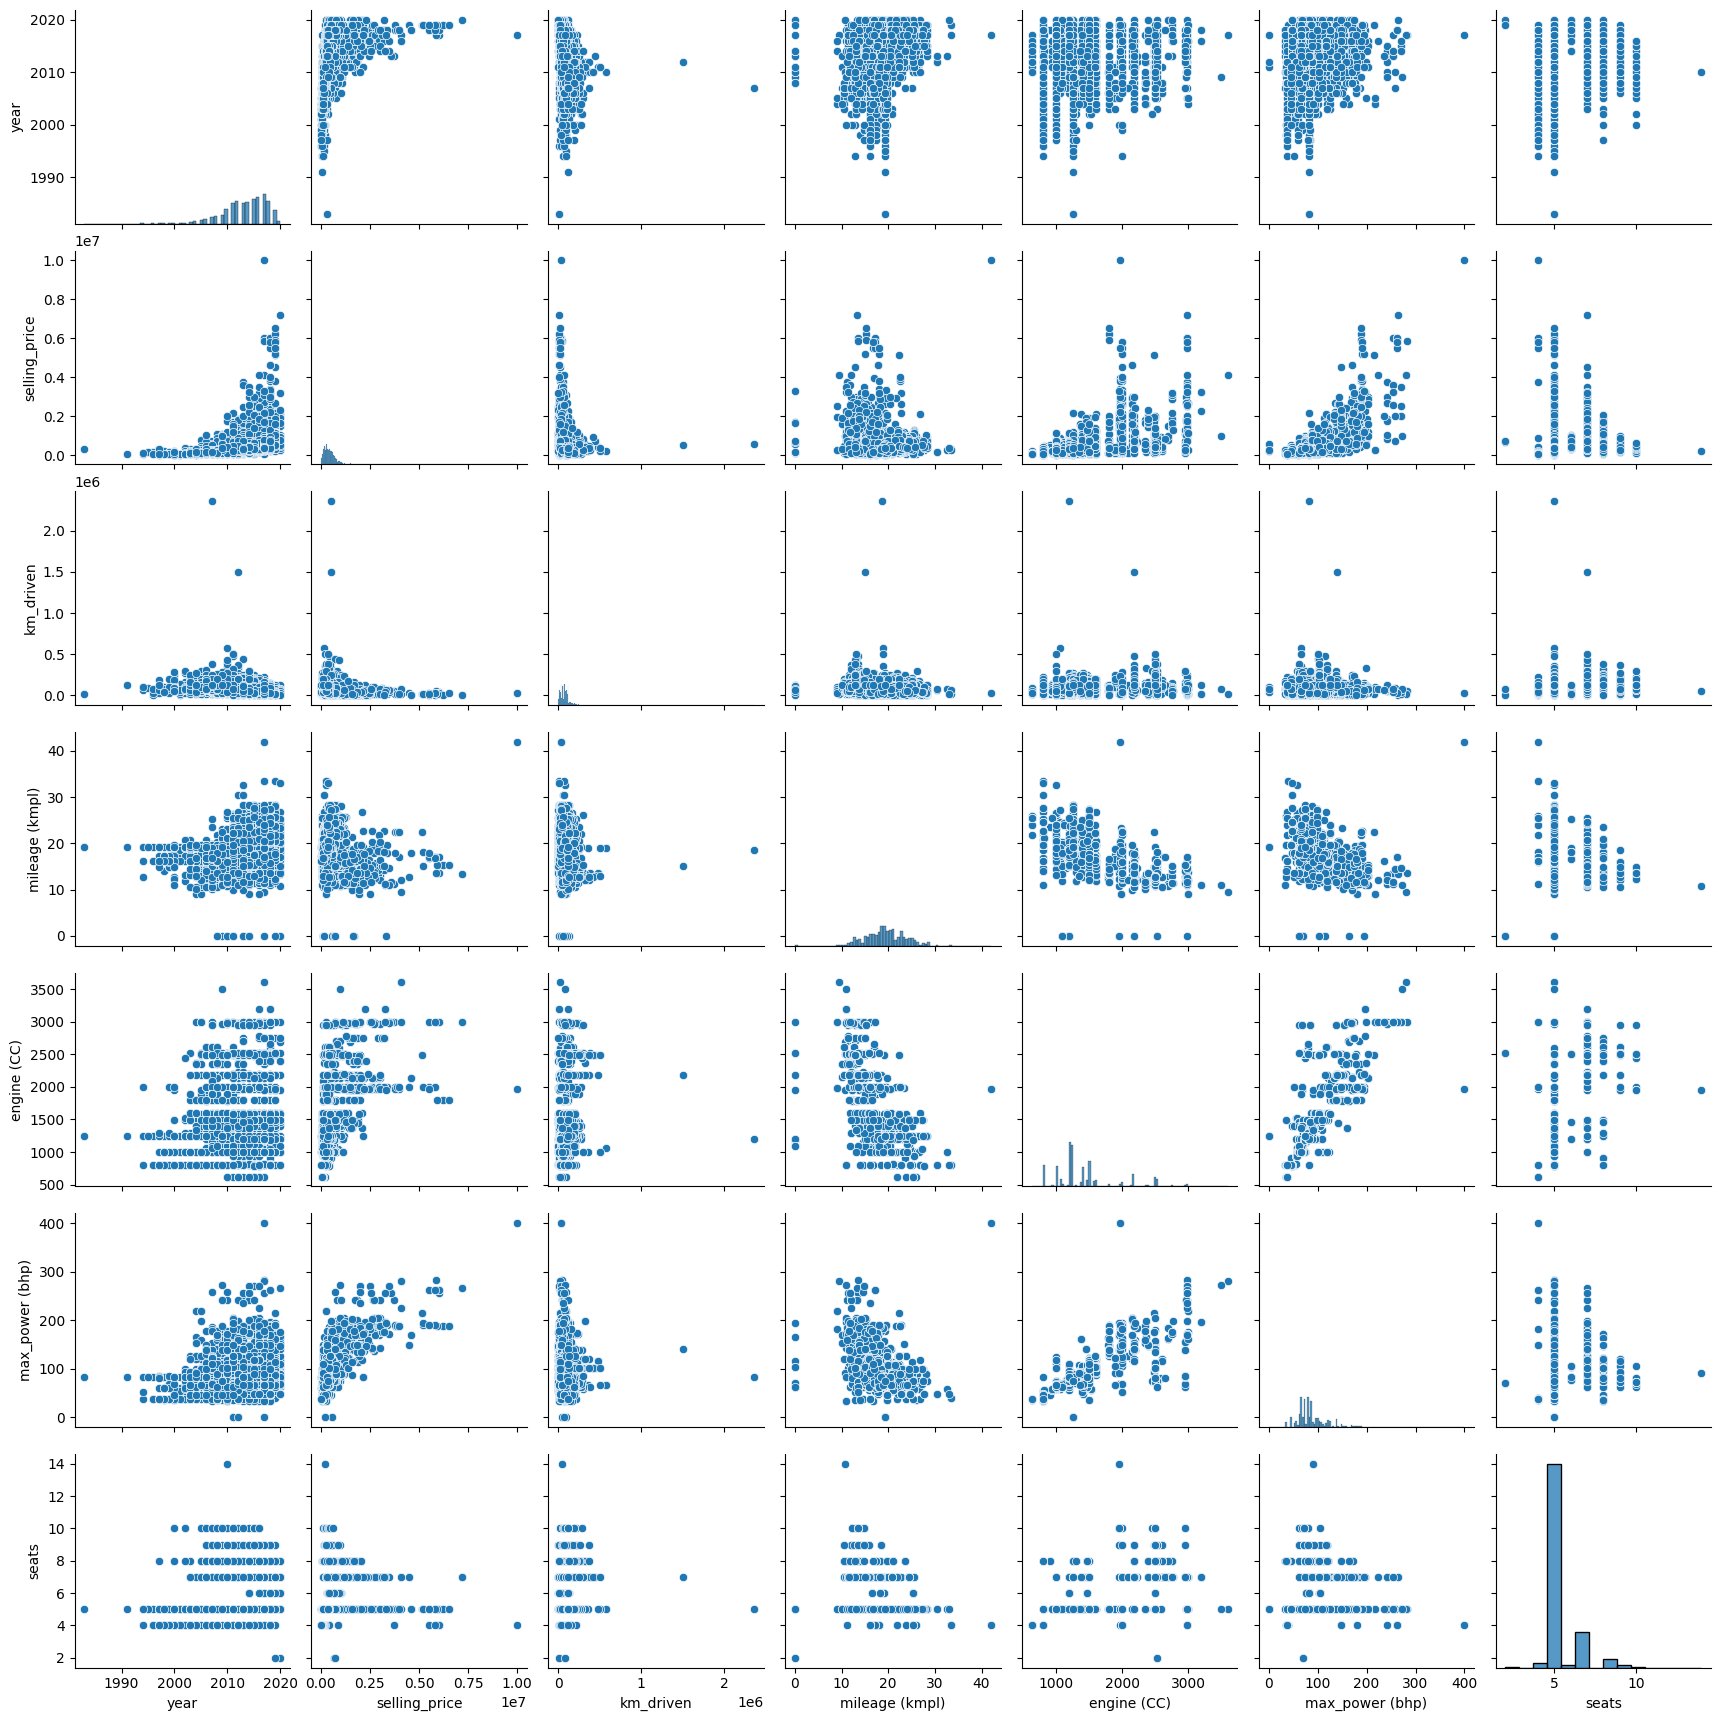

In [320]:
sns.pairplot(df_train)
plt.show()

На основе распределений признаков в сочетании с целевой переменной можно выдвинуть гипотезы о связи признаков с целевой переменной и корреляциях между ними. Однако, визуализация дает только предварительные предположения, и для получения окончательных выводов необходимо использовать статистические методы.



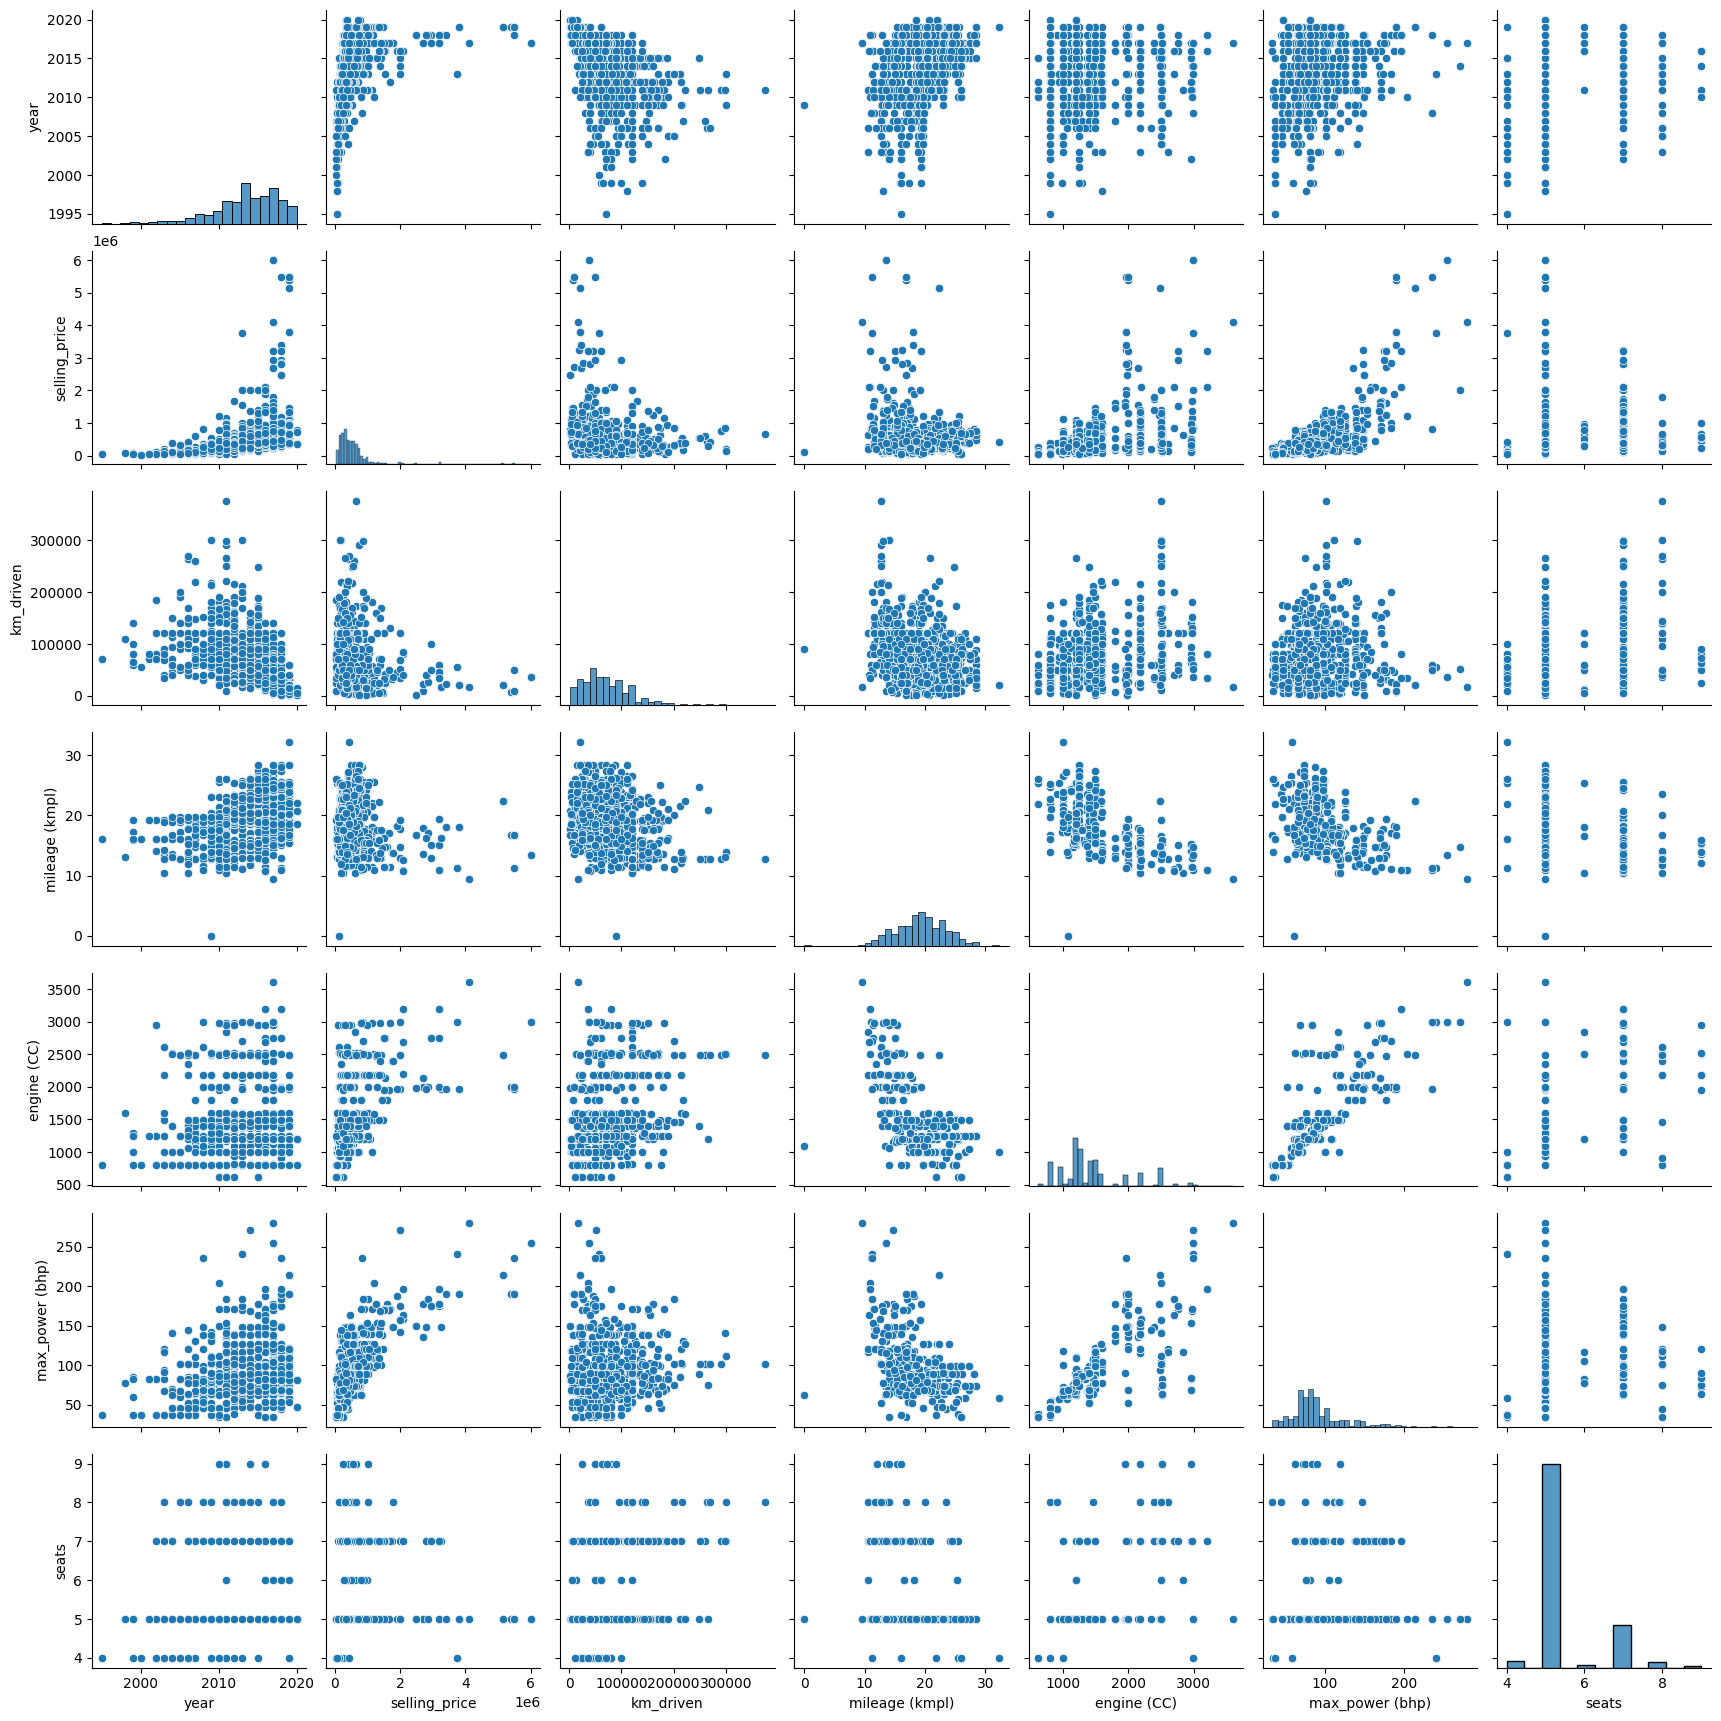

In [321]:
sns.pairplot(df_test)
plt.show()

В целом, совокупности оказались похожи. Есть, конечно, небольшие различия, но это ничего страшного.


Я выдвинула гипотезы о наличии связей между признаками и теперь оцениваю их количественно:

* рассчитала матрицу коэффициентов корреляции Пирсона для тренировочного датасета с помощью pd.corr(),
* визуализировала результат в виде тепловой карты с использованием seaborn.heatmap().


In [322]:
import seaborn as sns

In [323]:
df_train.corr(numeric_only=True)

,year,selling_price,km_driven,mileage (kmpl),engine (CC),max_power (bhp),seats
year,1.000000,0.427279,-0.368966,0.342172,0.002819,0.156648,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104458,0.447672,0.692754,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182245,0.229766,0.024630,0.192328
mileage (kmpl),0.342172,-0.104458,-0.182245,1.000000,-0.572677,-0.373271,-0.450810
engine (CC),0.002819,0.447672,0.229766,-0.572677,1.000000,0.681082,0.652172
max_power (bhp),0.156648,0.692754,0.024630,-0.373271,0.681082,1.000000,0.244060
seats,0.041178,0.149953,0.192328,-0.450810,0.652172,0.244060,1.000000


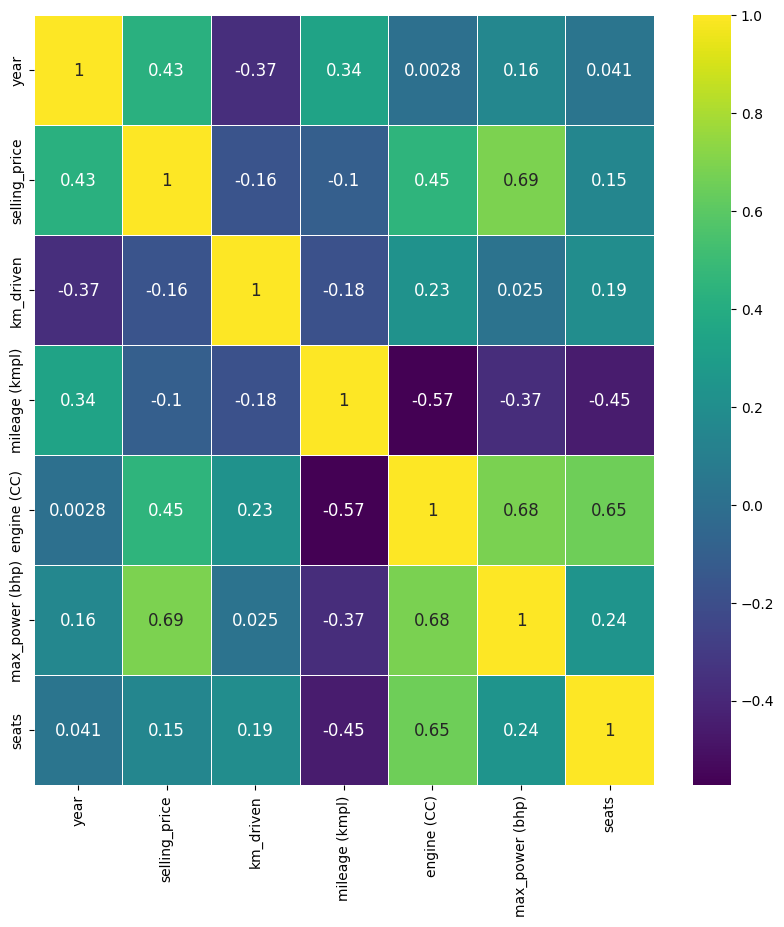

In [324]:
# Посмотрим на связь всех признаков с целевой переменной
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df_train.corr(numeric_only=True),
            linewidths=0.5, annot=True, cmap='viridis',
            linecolor='white', annot_kws={'size':12})

plt.show()

Значения коэффициента корреляции Пирсона варьируют от 0 до ±1. Значения, приближающиеся к 1, указывают на сильную положительную линейную корреляцию. Как можно увидеть по тепловой карте, сильная линейная связь наблюдается между целевой переменной 'selling_price' и переменной 'max_power (bhp)'.\
Также selling_price зависит от engine (CC) и year, но не так сильно.\
Если смотреть на зависимость переменных друг с другом, а не только с целевой переменной, то можно заметить, что сильная зависимость есть между переменной engine (CC) и переменными max_power (bhp), seats.\
Утверждение, что чем меньше год, тем больше километров проехала машина - верно, так как между переменными year и km_driven отрицательная линейная зависимость.

# **Часть 2 | Модель только на вещественных признаках**


Я создам копию датафрейма, оставив только вещественные признаки (все категориальные столбцы, кроме seats, удалю), а затем разобью данные на тренировочный и тестовый наборы. Значения целевой переменной запишу в переменные `y_train` и `y_test`.

In [325]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248,74.000000,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498,103.519997,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396,90.000000,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298,88.199997,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.139999,1197,81.860001,5


In [326]:
df_train_copy = df_train.select_dtypes(['integer', 'float'])

In [327]:
y_train = df_train_copy['selling_price']
X_train = df_train_copy.drop(['selling_price'], axis=1)

In [328]:
assert X_train.shape == (5840, 6)

In [329]:
df_test_copy = df_test.select_dtypes(['integer', 'float'])

In [330]:
y_test = df_test_copy['selling_price']
X_test = df_test_copy.drop(['selling_price'], axis=1)

In [331]:
df_train_copy.shape

(5840, 7)

In [332]:
df_test_copy.shape

(1000, 7)

In [333]:
df_test_copy.head()

,year,selling_price,km_driven,mileage (kmpl),engine (CC),max_power (bhp),seats
0,2010,229999,168000,14.0,2498,112.000000,7
1,2017,665000,25000,21.5,1497,108.500000,5
2,2007,175000,218463,12.9,1799,130.000000,5
3,2015,635000,173000,25.1,1498,98.599998,5
4,2011,130000,70000,16.5,1172,65.000000,5


In [77]:
assert X_test.shape == (1000, 6)

In [334]:
# Посмотрим
X_train.head()

,year,km_driven,mileage (kmpl),engine (CC),max_power (bhp),seats
0,2014,145500,23.400000,1248,74.000000,5
1,2014,120000,21.139999,1498,103.519997,5
2,2010,127000,23.000000,1396,90.000000,5
3,2007,120000,16.100000,1298,88.199997,5
4,2017,45000,20.139999,1197,81.860001,5


In [335]:
y_train.head()

,selling_price
0,450000
1,370000
2,225000
3,130000
4,440000


Я построю свою первую модель:
* *обучу линейную регрессию с параметрами по умолчанию и рассчитаю метрики $R^2$ и $\mathrm{MSE}$ как на тренировочной, так и на тестовой выборке;
* на основе полученных значений сделаю выводы о качестве модели и наличии переобучения или недообучения.


Все последующие эксперименты с моделями я также буду сопровождать значениями $R^2$ и $MSE$ на `train` и `test` — чтобы оценка результатов оставалась прозрачной и сопоставимой.

In [336]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

#Обучаем модель
lr = LinearRegression()
lr.fit(X_train, y_train)

#Делаем предсказания на тестовой выборке
y_pred1 = lr.predict(X_test)

# Рассчитываем R2 и MSE
r2 = r2_score(y_test, y_pred1)
mse = MSE(y_test, y_pred1)

In [337]:
print(f'R2 = {r2:.4f}')
print(f'MSE = {mse:.4f}')

R2 = 0.5941
MSE = 233297550632.1805


Если смотреть на значение $R^2$, то можно сказать, что примерно 59.41% вариации в целевой переменной может быть объяснено данной моделью. В целом, не так плохо, но более 40% вариаций необъяснимо. Это значит, что нашу модель можно улучшить еще (например, стандатизировать).\
MSE в данном случае слишком велико тк нет стандартизации (нет понимания масштабов целевой переменной).

Я улучшу модель с помощью стандартизации признаков:

стандартизирую данные в тренировочном и тестовом наборах, обучив стандартизатор только на train, чтобы избежать утечки информации из тестовой выборки.

In [338]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# df_train_copy
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train.head()

,year,km_driven,mileage (kmpl),engine (CC),max_power (bhp),seats
0,0.139570,1.191152,0.996413,-0.373643,-0.439702,-0.434419
1,0.139570,0.766619,0.429384,0.141162,0.493387,-0.434419
2,-0.837167,0.883158,0.896054,-0.068879,0.066037,-0.434419
3,-1.569719,0.766619,-0.835142,-0.270682,0.009142,-0.434419
4,0.872122,-0.482007,0.178486,-0.478663,-0.191257,-0.434419


In [339]:
y_train.head()

,selling_price
0,450000
1,370000
2,225000
3,130000
4,440000


In [340]:
# df_test_copy
X_test  = pd.DataFrame(scaler.fit_transform(X_test ), columns=X_test.columns)
X_test .head()

,year,km_driven,mileage (kmpl),engine (CC),max_power (bhp),seats
0,-0.917923,1.993453,-1.351338,1.999338,0.606610,1.750206
1,0.827651,-0.957314,0.547505,0.080738,0.506252,-0.441661
2,-1.666026,3.034744,-1.629835,0.659577,1.122735,-0.441661
3,0.328916,2.096627,1.458949,0.082655,0.222383,-0.441661
4,-0.668555,-0.028751,-0.718390,-0.542184,-0.741051,-0.441661


In [341]:
y_test.head()

,selling_price
0,229999
1,665000
2,175000
3,635000
4,130000


In [342]:
lr.fit(X_train, y_train)
y_pred2 = lr.predict(X_test)
r2 = r2_score(y_test, y_pred2)
mse = MSE(y_test, y_pred2)

In [343]:
print(f'R2 = {r2:.4f}')
print(f'MSE = {mse:.4f}')

R2 = 0.5654
MSE = 249831862747.9752


Тут модель еще хуже, объясняет около 56.54%. MSE тоже стало хуже.

Хотя стандартизация не даст существенного прироста в качестве, она позволит интерпретировать важность признаков: чем больше модуль коэффициента $\beta_i$, тем важнее соответствующий признак.
Я отвечу на вопрос: какой признак окажется наиболее информативным для предсказания цены.

In [344]:
# Получаем коэффициенты
coefficients = lr.coef_

In [345]:
# Создаем DataFrame с признаками и их коэффициентами
feature_importance = pd.DataFrame({'X_train': X_train.columns, 'Coefficient': coefficients})

# Сортируем по модулю коэффициентов
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

feature_importance

,X_train,Coefficient,Absolute_Coefficient
4,max_power (bhp),322779.699435,322779.699435
0,year,152843.260139,152843.260139
3,engine (CC),61176.865173,61176.865173
1,km_driven,-44148.048382,44148.048382
2,mileage (kmpl),28781.091712,28781.091712
5,seats,-23220.572032,23220.572032


В предсказании цены наиболее информативным оказался max_power (bhp). Чем выше max_power (bhp), тем выше цена.

Я попробую улучшить модель с помощью регуляризации, используя Lasso-регрессию.

* Обучу Lasso на тренировочном наборе с нормализованными признаками и оценю её качество по метрикам $R^2$ и MSE на train и test.
* Проверю, занулила ли L1-регуляризация (с параметрами по умолчанию) какие-либо коэффициенты, и предположу, почему именно эти признаки были сочтены незначимыми.

In [346]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred3 = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred3)
mse = MSE(y_test, y_pred3)

In [347]:
print(f'R2 = {r2:.4f}')
print(f'MSE = {mse:.4f}')

R2 = 0.5654
MSE = 249831934848.2845


In [348]:
# Проверка занулённых весов
coef = pd.DataFrame(lasso.coef_, index=X_train.columns, columns=['Coefficient'])
coef

,Coefficient
year,152843.243689
km_driven,-44147.935034
mileage (kmpl),28780.901807
engine (CC),61176.381474
max_power (bhp),322779.787376
seats,-23220.284774


L1 ничего не занулила.

Ранее я использовала `train` для обучения и `test` для прогнозирования, но теперь мне нужно подобрать оптимальные гиперпараметры. Для этого я воспользуюсь кросс-валидацией.

Моя задача 1:

* С помощью GridSearchCV я проведу перебор по сетке с 10 фолдами, чтобы найти лучшие параметры для Lasso-регрессии.

Отвечу на вопросы:
* Сколько всего моделей пришлось обучить в ходе грид-серча?
* Какой коэффициент регуляризации оказался оптимальным у лучшей модели? Занулились ли при этом какие-нибудь веса?

In [349]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=lasso, param_grid={'alpha': np.logspace(-4, 4, 10)}, cv=10)
grid_search.fit(X_train, y_train)

# Вывод результатов
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
print(f'Оптимальный коэффициент регуляризации (alpha) = {best_alpha:.4f}')

Оптимальный коэффициент регуляризации (alpha) = 10000.0000


In [350]:
y_pred4 = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred4)
mse = MSE(y_test, y_pred4)

In [351]:
print(f'R2 = {r2:.4f}')
print(f'MSE = {mse:.4f}')

R2 = 0.5520
MSE = 257536750512.3736


In [352]:
# Проверка на зануленные веса
coef = pd.DataFrame(best_model.coef_, index=X_train.columns, columns=['Coefficient'])
print(coef)

                   Coefficient
year             151898.111326
km_driven        -32723.300135
mileage (kmpl)     9238.175427
engine (CC)       17841.941779
max_power (bhp)  329198.986637
seats                -0.000000


Занулились веса seats

In [353]:
# Подсчет количества обученных моделей
num_models_trained = len(grid_search.cv_results_['params'])
print(f'Количество обученных моделей: {num_models_trained}')

Количество обученных моделей: 10


Количество моделей * количество фолдов = количество обученных меделей ==> 10 * 10 = 100

Я проведу подбор гиперпараметров для ElasticNet-регрессии с помощью перебора по сетке и 10-фолдовой кросс-валидации.
После завершения поиска я отвечу на вопросы:

Сколько всего моделей пришлось обучить в ходе грид-серча?
Какие значения гиперпараметров (alpha, l1_ratio и др.) оказались оптимальными для лучшей модели согласно выбранной метрике качества?

In [354]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': np.logspace(-4, 1, 10),  # Различные значения для alpha
    'l1_ratio': np.linspace(0, 1, 10)  # Значения от 0 до 1 для доли L1
}

elastic_net = ElasticNet()
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Вывод результатов
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.541e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.193e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

In [355]:
print(f'Лучшие гиперпараметры = {best_params}')

Лучшие гиперпараметры = {'alpha': 0.21544346900318845, 'l1_ratio': 0.3333333333333333}


In [356]:
y_pred5 = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred5)
mse = MSE(y_test, y_pred5)

In [357]:
print(f'R2 = {r2:.4f}')
print(f'MSE = {mse:.4f}')

R2 = 0.5341
MSE = 267786225604.7061


In [358]:
num_models_trained = len(grid_search.cv_results_['params'])
print(f'Количество обученных моделей: {num_models_trained}')

Количество обученных моделей: 100


# **Часть 3| Добавляем категориальные фичи**


Я проанализирую столбец `name` и увижу, что, хотя он является категориальным, в нём слишком много уникальных значений. Поскольку его обработка в рамках этого задания нецелесообразна, я просто удалю столбец `name` из датасета.

In [359]:
df_train.drop(columns=['name'], inplace=True)
df_test.drop(columns=['name'], inplace=True)

In [360]:
df_train.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248,74.000000,5
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498,103.519997,5
2,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396,90.000000,5
3,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298,88.199997,5
4,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.139999,1197,81.860001,5



Я закодирую категориальные признаки и столбец `seats` с помощью OneHot-кодирования, удалив по одному столбцу для каждого исходного признака, чтобы избежать мультиколлинеарности.

In [361]:
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

In [362]:
# Создаем таблицу с категориальными переменными и с переменной 'seats'
df_train_copy = df_train.select_dtypes(['category'])
df_train_copy = df_train_copy.join(df_train['seats'], how='outer')

df_test_copy = df_test.select_dtypes(['category'])
df_test_copy = df_test_copy.join(df_test['seats'], how='outer')

In [363]:
df_train_copy.head()

,fuel,seller_type,transmission,owner,seats
0,Diesel,Individual,Manual,First Owner,5
1,Diesel,Individual,Manual,Second Owner,5
2,Diesel,Individual,Manual,First Owner,5
3,Petrol,Individual,Manual,First Owner,5
4,Petrol,Individual,Manual,First Owner,5


In [364]:
X_train = pd.get_dummies(df_train_copy, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'], drop_first=True).astype(int)
X_train.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [365]:
X_train.shape

(5840, 18)

In [366]:
X_test = pd.get_dummies(df_test_copy, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'], drop_first=True).astype(int)
X_test.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_5,seats_6,seats_7,seats_8,seats_9
0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0


In [367]:
X_test.shape

(1000, 15)

ПРОБЛЕМА! Получились разные размеры таблицы из-за переменной 'seats'.

In [368]:
np.sort(df_train['seats'].unique())

array([ 2,  4,  5,  6,  7,  8,  9, 10, 14], dtype=int8)

In [369]:
np.sort(df_test['seats'].unique())

array([4, 5, 6, 7, 8, 9], dtype=int8)

В таком случае удалим из X_train столбцы 4, 10, 14 переменной 'seats'.

In [370]:
X_train.drop(columns=['seats_4', 'seats_10', 'seats_14'], inplace=True)
X_train.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_5,seats_6,seats_7,seats_8,seats_9
0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0


In [371]:
X_train.shape

(5840, 15)


Я повторю процедуру, выполненную ранее для других моделей, но теперь с Ridge-регрессией:

* с помощью GridSearchCV я подберу оптимальное значение параметра регуляризации `alpha`, используя 10 фолдов и метрику качества  $R^2$;
* после подбора я отвечу на вопрос: удалось ли улучшить качество прогнозов по сравнению с предыдущими моделями.

In [372]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha_values = np.logspace(-4, 4, 10)
param_grid = {'alpha': alpha_values}

ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             scoring='r2')

In [373]:
# Лучшая модель и её параметры
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

In [374]:
y_pred6 = best_model.predict(X_test)
best_r2 = r2_score(y_test, y_pred6)
best_mse = MSE(y_test, y_pred6)

In [375]:
# Исходная модель без подбора
ridge_default = Ridge(alpha=1.0)
ridge_default.fit(X_train, y_train)
y_pred7 = ridge_default.predict(X_test)
r2 = r2_score(y_test, y_pred7)
mse = MSE(y_test, y_pred7)

In [376]:
print(f'Лучший коэффициент регуляризации alpha: {best_alpha:.4f}')
print(f'R2 = {best_r2:.4f}')
print(f'MSE = {best_mse:.4f}')
print('\n')
print('Исходная модель без подбора')
print(f'R2 = {r2:.4f}')
print(f'MSE = {mse:.4f}')

Лучший коэффициент регуляризации alpha: 21.5443
R2 = 0.4151
MSE = 336230864075.6035


Исходная модель без подбора
R2 = 0.4062
MSE = 341310376385.9216


Немного качество улучшилось. MSE по прежнему велик тк модель не знает ограничений для y

# **Часть 4. | Бизнесовая **

В мире бизнеса важно оценивать качество модели в терминах, понятных заказчику, поэтому я реализую кастомную метрику под задачу.

Моя задача:

* Я напишу функцию business_metric, которая будет вычислять долю предсказаний, отличающихся от истинных цен не более чем на 10 % (в любую сторону).
* Затем я применю эту метрику ко всем обученным моделям и определю, какая из них лучше всего решает бизнес-задачу.

In [377]:
def business_metric(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    lower_bound = y_true * 0.9  # 10% меньше
    upper_bound = y_true * 1.1  # 10% больше

    acceptable_predictions = (y_pred >= lower_bound) & (y_pred <= upper_bound)
    return np.mean(acceptable_predictions)

In [378]:
y_pred = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6, y_pred7]

for i in range(len(y_pred)):
    print(f'Модель {i+1}: Значение метрики = {business_metric(y_test, y_pred[i]):.4f}')

Модель 1: Значение метрики = 0.2270
Модель 2: Значение метрики = 0.2370
Модель 3: Значение метрики = 0.2370
Модель 4: Значение метрики = 0.2510
Модель 5: Значение метрики = 0.2520
Модель 6: Значение метрики = 0.1520
Модель 7: Значение метрики = 0.1380


Как видно, самая лучшая модель 5 - перебор по сетке (c 10-ю фолдами) оптимального параметра для ElasticNet регрессии.